# Exploratory Data Analysis in Python

Dataset from Kaggle : **"Pokemon with stats"** by *Alberto Barradas*  
Source: https://www.kaggle.com/abcsds/pokemon (requires login)

Inspired by the wonderful EDA on Pokemon Data by [Redwan Huq](http://inmachineswetrust.com/posts/exploring-pokemon-dataset/).

![Gotta Catch 'Em All!](images/PokemonIntro.png)

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [8]:
pkmndata = pd.read_csv('pokemonData.csv')
pkmndata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Description of the dataset, as available on Kaggle, is as follows.
Learn more : https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon

> **\#** : ID for each Pokemon (runs from 1 to 721)  
> **Name** : Name of each Pokemon  
> **Type 1** : Each Pokemon has a basic Type, this determines weakness/resistance to attacks  
> **Type 2** : Some Pokemons are dual type and have a Type 2 value (set to nan otherwise)  
> **Total** : Sum of all stats of a Pokemon, a general guide to how strong a Pokemon is  
> **HP** : Hit Points, defines how much damage a Pokemon can withstand before fainting  
> **Attack** : The base modifier for normal attacks by the Pokemon (e.g., scratch, punch etc.)  
> **Defense** : The base damage resistance of the Pokemon against normal attacks  
> **SP Atk** : Special Attack, the base modifier for special attacks (e.g. fire blast, bubble beam)  
> **SP Def** : Special Defense, the base damage resistance against special attacks  
> **Speed** : Determines which Pokemon attacks first each round  
> **Generation** : Each Pokemon belongs to a certain Generation  
> **Legendary** : Legendary Pokemons are powerful, rare, and hard to catch

---

Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [4]:
print("Data type : ", type(pkmndata))
print("Data dims : ", pkmndata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (800, 13)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [9]:
print(pkmndata.dtypes)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


---

## Explore the Dataset

Exploring any dataset requires a solid understanding of the domain -- it is Pokemon, in our case.    
We understand the following basics regarding Pokemon, primarily from [Wikipedia](https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon) and [Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Generation).    

> **Generation** : There are seven generations of Pokemon as of 2018, with 721 till Generation VI (this dataset).   
> **Type** : Every Pokemon has a *primary* type, and some of them also have a *secondary* type -- dual-type ones.    
> **Legendary** : These Pokemons are rare, powerful, and really hard to catch -- there are 38 upto Generation VI.    

Way more trivia about Pokemon is available online -- but let's come back and retrieve more information from the data.

In [6]:
# Information about the Variables
pkmndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


#### Generations of Pokemon in the Dataset

Number of Generations : 6
1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64


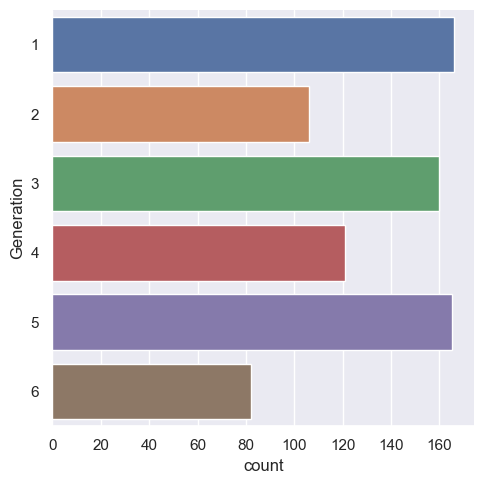

In [7]:
# Generations in the Dataset
print("Number of Generations :", len(pkmndata["Generation"].unique()))

# Pokemons in each Generation
print(pkmndata["Generation"].value_counts())
sb.catplot(y = "Generation", data = pkmndata, kind = "count")

#### Types of Pokemon in the Dataset

![Types of Pokemon](images/PokemonTypes.png)

We understand that there are 18 Sun and Moon types for Pokemons, as shown in the image above, and some have both the Sun and Moon types.   

Number of Primary Types : 18
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


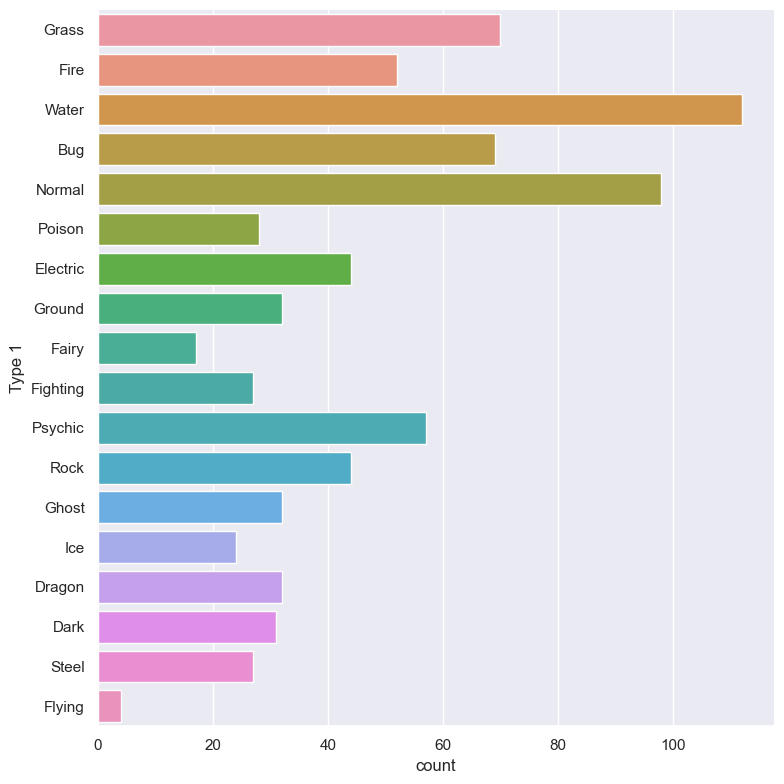

In [10]:
# Primary Types in the Dataset
print("Number of Primary Types :", len(pkmndata["Type 1"].unique()))

# Pokemons of each Primary Type
print(pkmndata["Type 1"].value_counts())
sb.catplot(y = "Type 1", data = pkmndata, kind = "count", height = 8)

Number of Secondary Types : 18
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64


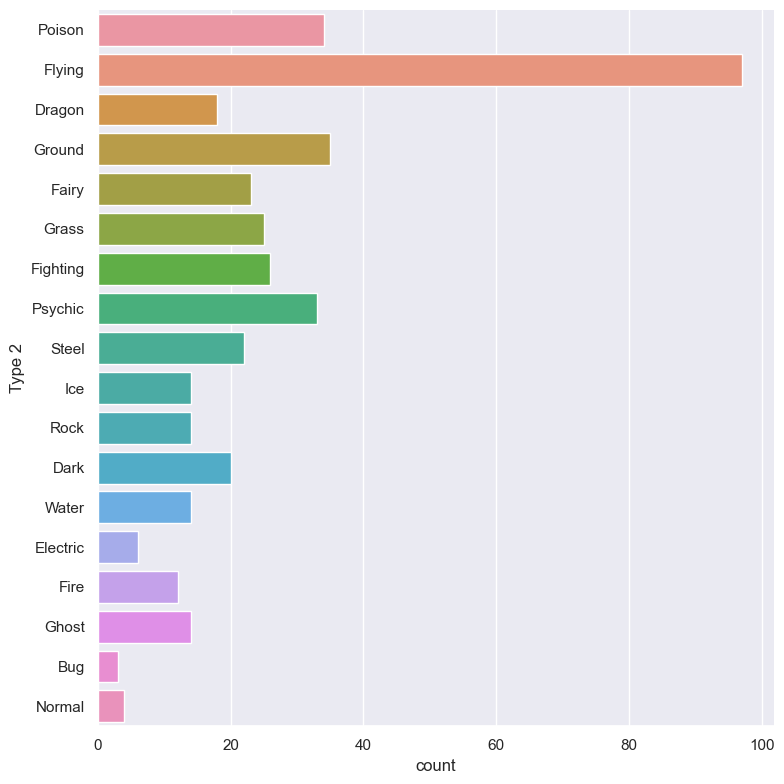

In [14]:
# Secondary Types in the Dataset
print("Number of Secondary Types :", len(pkmndata["Type 2"].dropna().unique()))

# Pokemons of each Secondary Type
print(pkmndata["Type 2"].dropna().value_counts())
sb.catplot(y = "Type 2", data = pkmndata, kind = "count", height = 8)

In [17]:
# Pokemons with a Single Type -- I
singletype_data = pkmndata[pkmndata["Type 2"].isnull()]
print("Pokemons with just Type 1 :", len(singletype_data))
singletype_data.head()

Pokemons with just Type 1 : 386


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False


In [16]:
# Pokemons with Dual Types -- I and II
dualtype_data = pkmndata[pkmndata["Type 2"].isnull() == False]
print("Pokemons with Types 1 and 2 :", len(dualtype_data))
dualtype_data.head()

Pokemons with Types 1 and 2 : 414


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False


#### Types of Pokemon over Generations

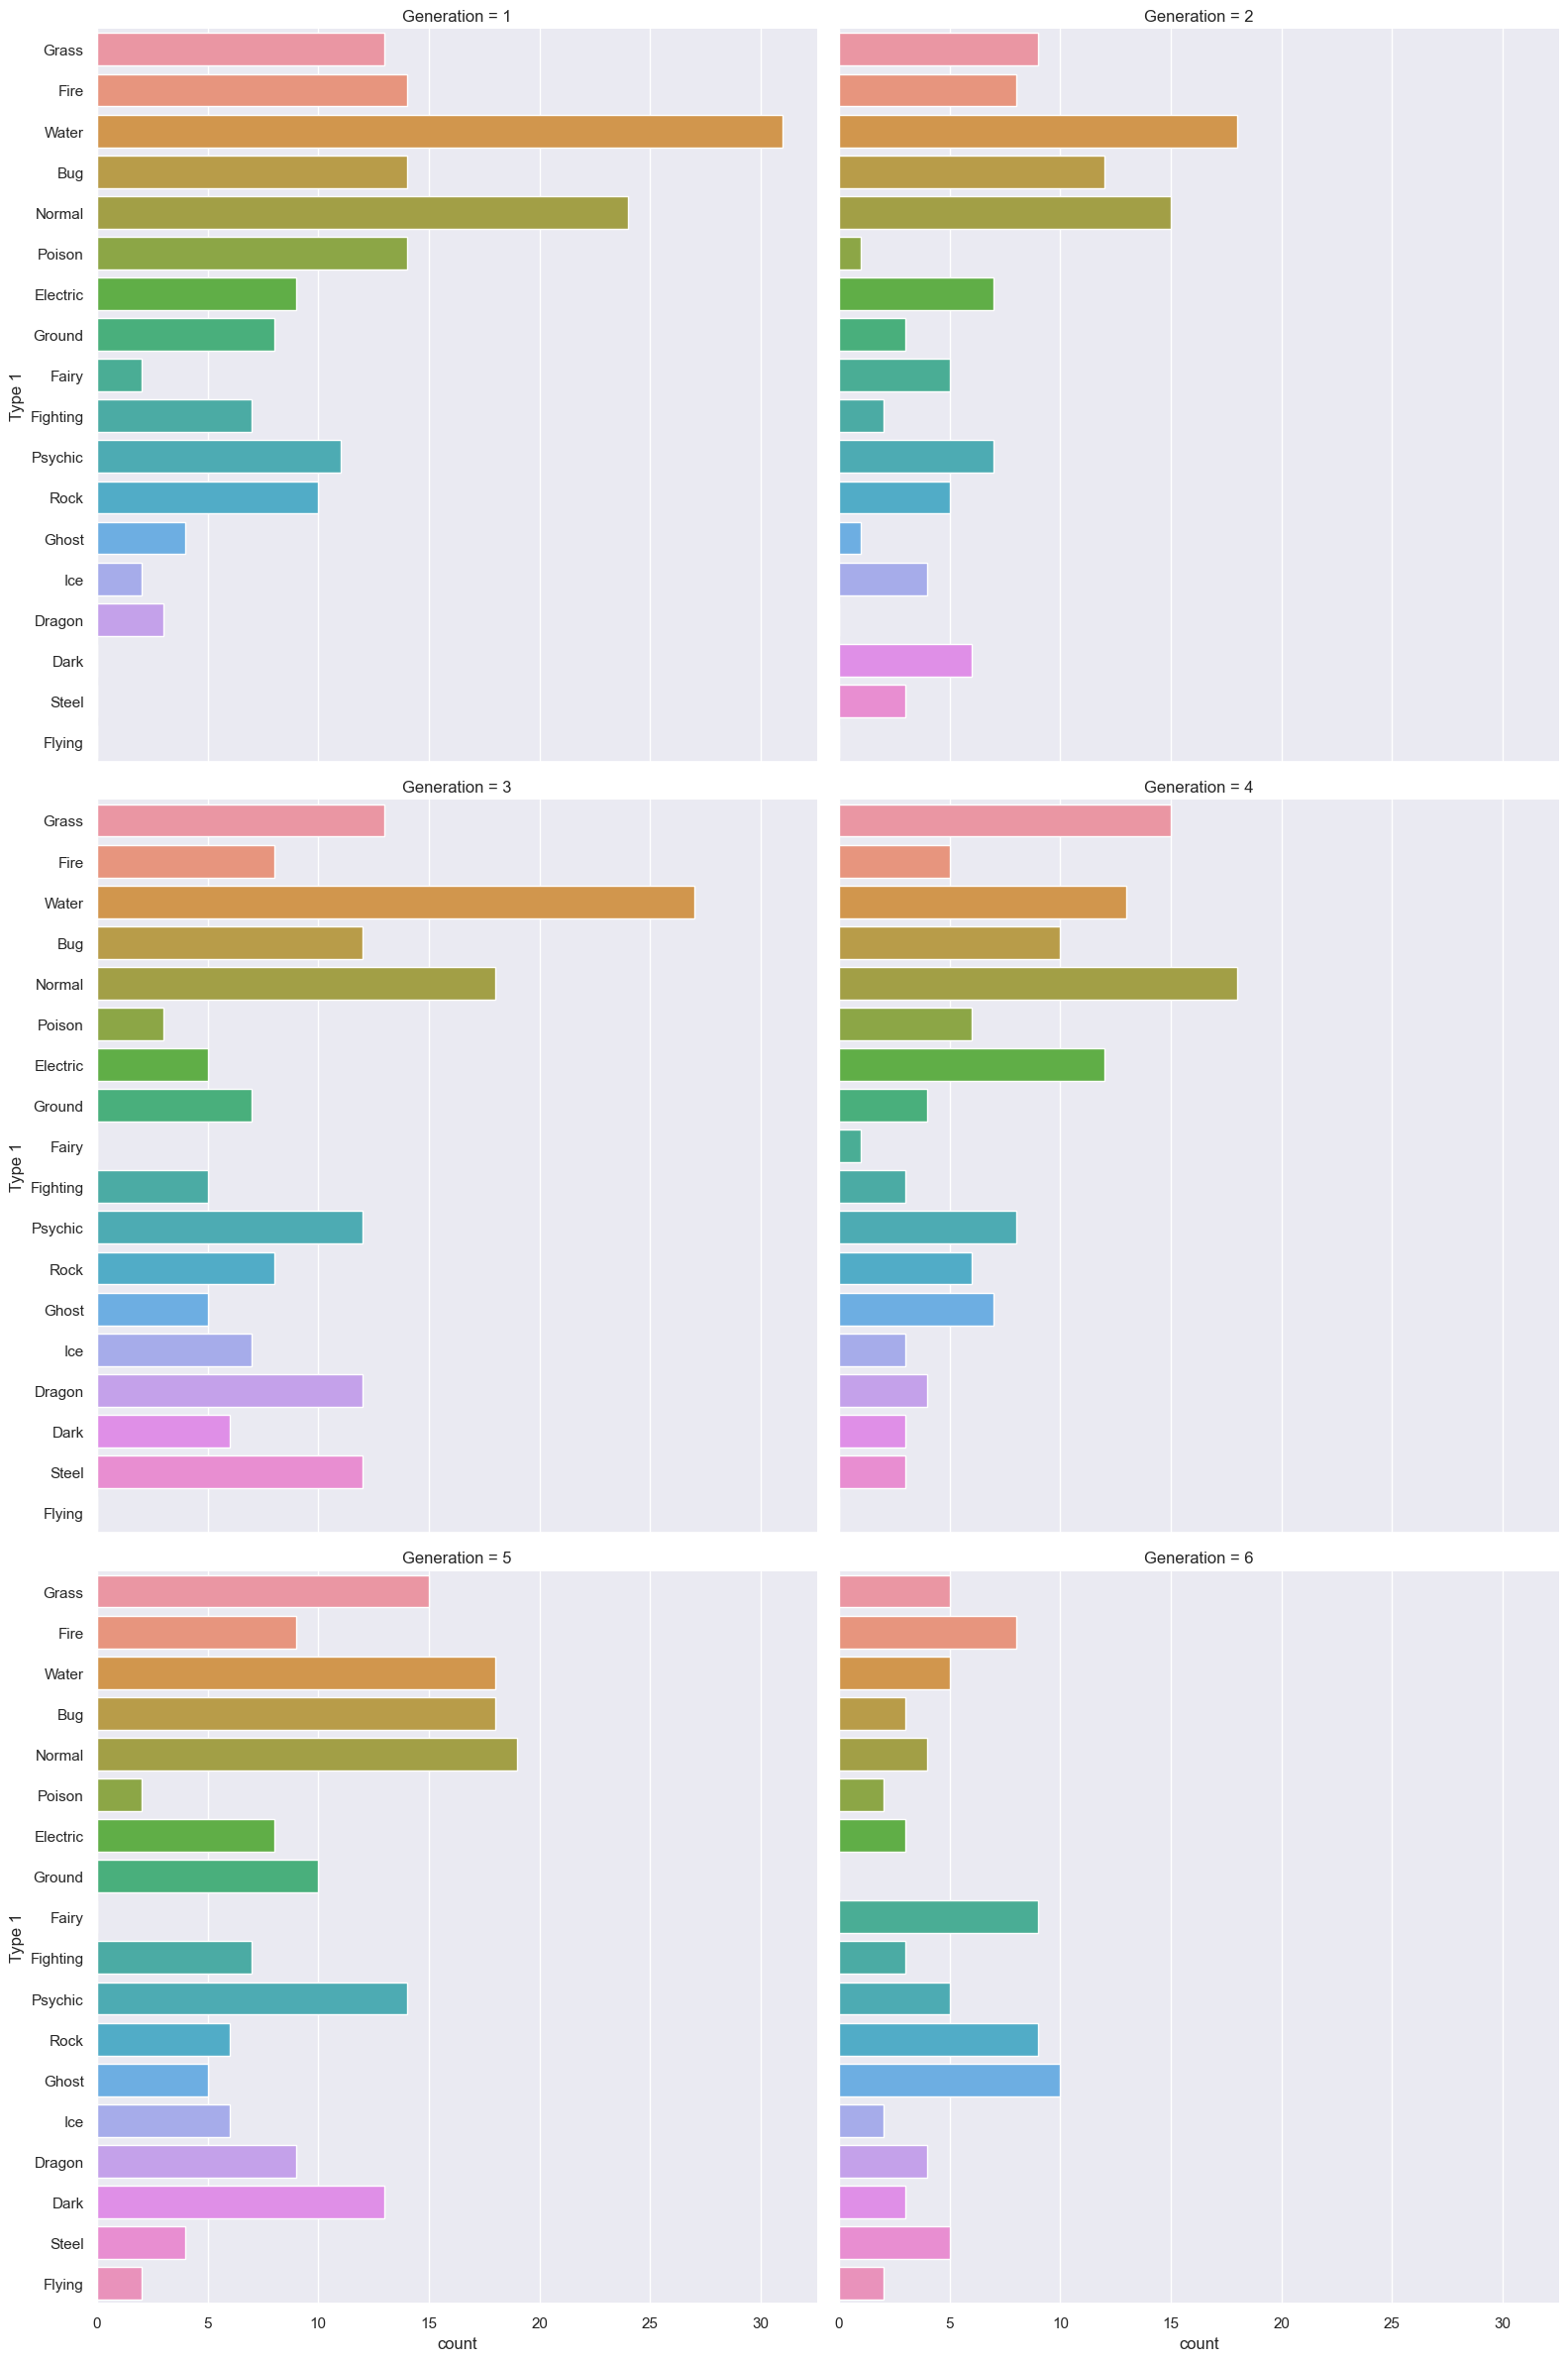

In [21]:
# Primary Type over Generations
sb.catplot(y = 'Type 1', data = pkmndata, col = 'Generation', kind = 'count', col_wrap = 2, height = 8)

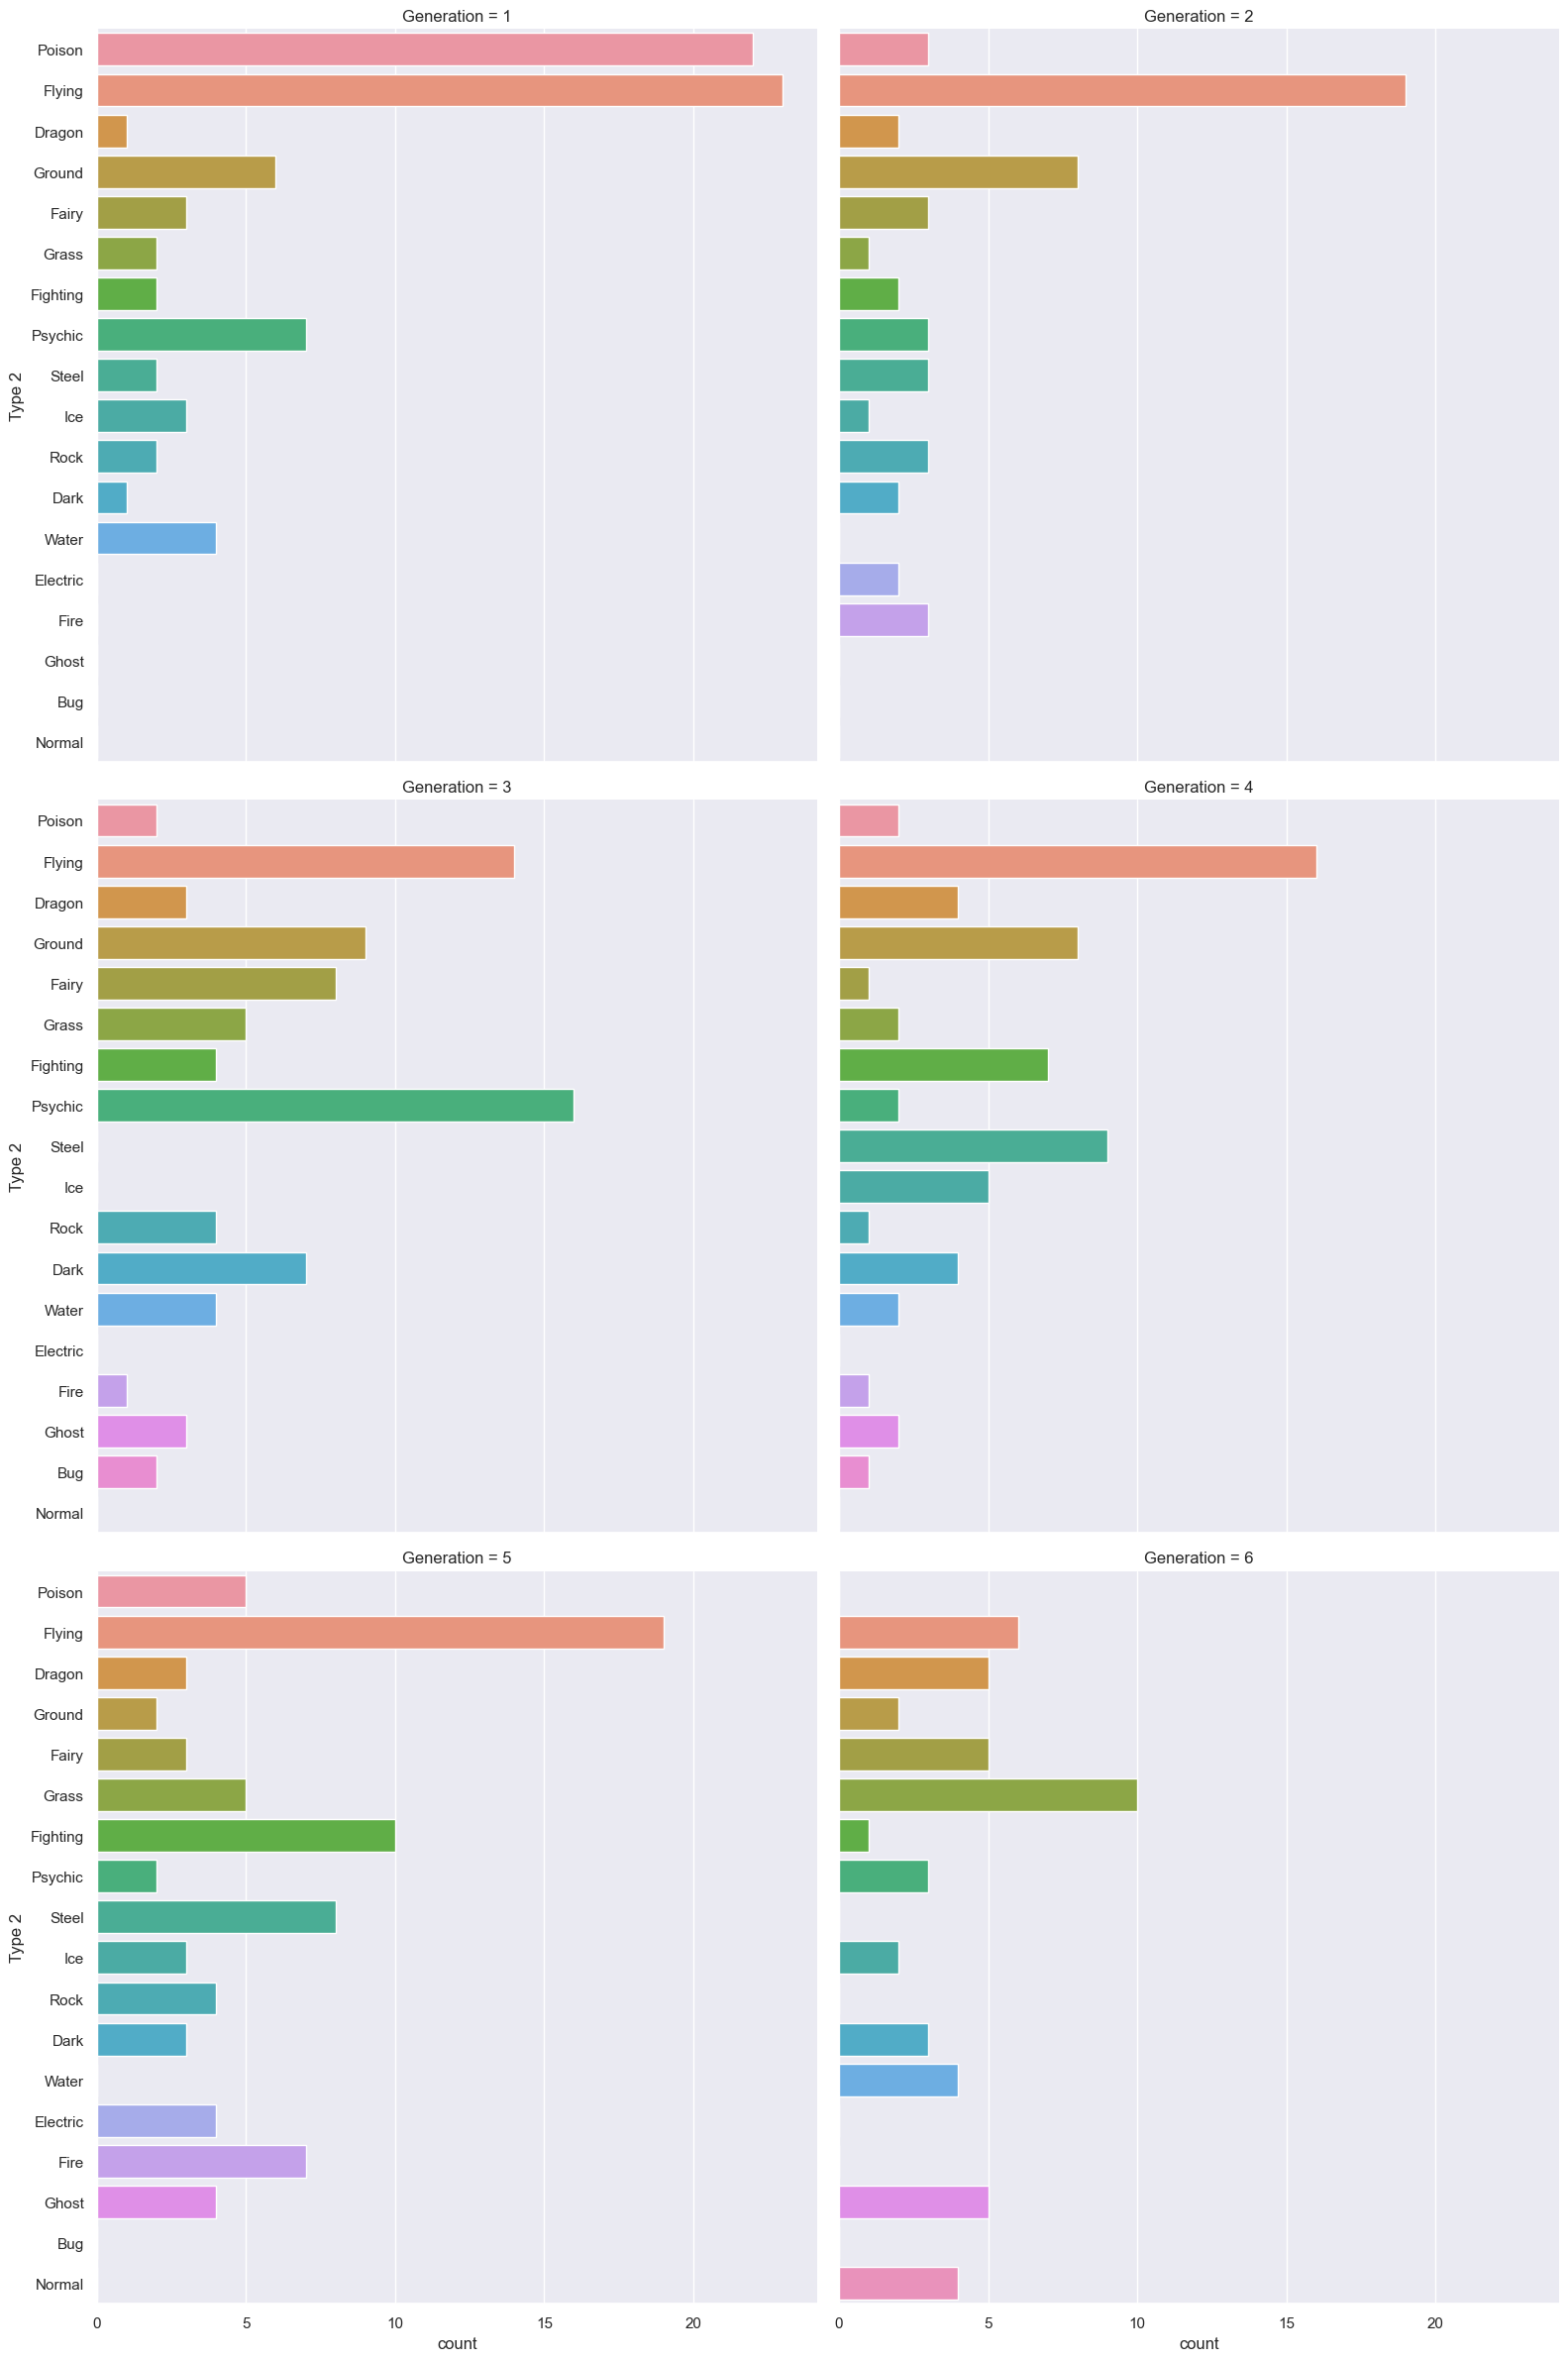

In [22]:
# Secondary Type over Generations
sb.catplot(y = 'Type 2', data = pkmndata, col = 'Generation', kind = 'count', col_wrap = 2, height = 8)

#### Type distribution of Dual-Type Pokemons

In [30]:
dualtype_data = pkmndata[pkmndata["Type 2"].isnull() == False]
dualtype_data.groupby(["Type 1", "Type 2"]).size().unstack()

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 1,,,,,,,,,,,,,,,,,,
Bug,NaN,NaN,NaN,2.0,NaN,2.0,2.0,14.0,1.0,6.0,2.0,NaN,NaN,12.0,NaN,3.0,7.0,1.0
Dark,NaN,NaN,3.0,NaN,NaN,2.0,3.0,5.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,NaN
Dragon,NaN,NaN,NaN,1.0,1.0,NaN,1.0,6.0,NaN,NaN,5.0,3.0,NaN,NaN,4.0,NaN,NaN,NaN
Electric,NaN,NaN,1.0,NaN,1.0,NaN,1.0,5.0,1.0,1.0,NaN,1.0,2.0,NaN,NaN,NaN,3.0,1.0
Fairy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fighting,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN
Fire,NaN,NaN,1.0,NaN,NaN,7.0,NaN,6.0,NaN,NaN,3.0,NaN,2.0,NaN,2.0,1.0,1.0,1.0
Flying,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ghost,NaN,1.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,10.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN


Pokemons with Types 1 and 2 : 414


<AxesSubplot: xlabel='Type 2', ylabel='Type 1'>

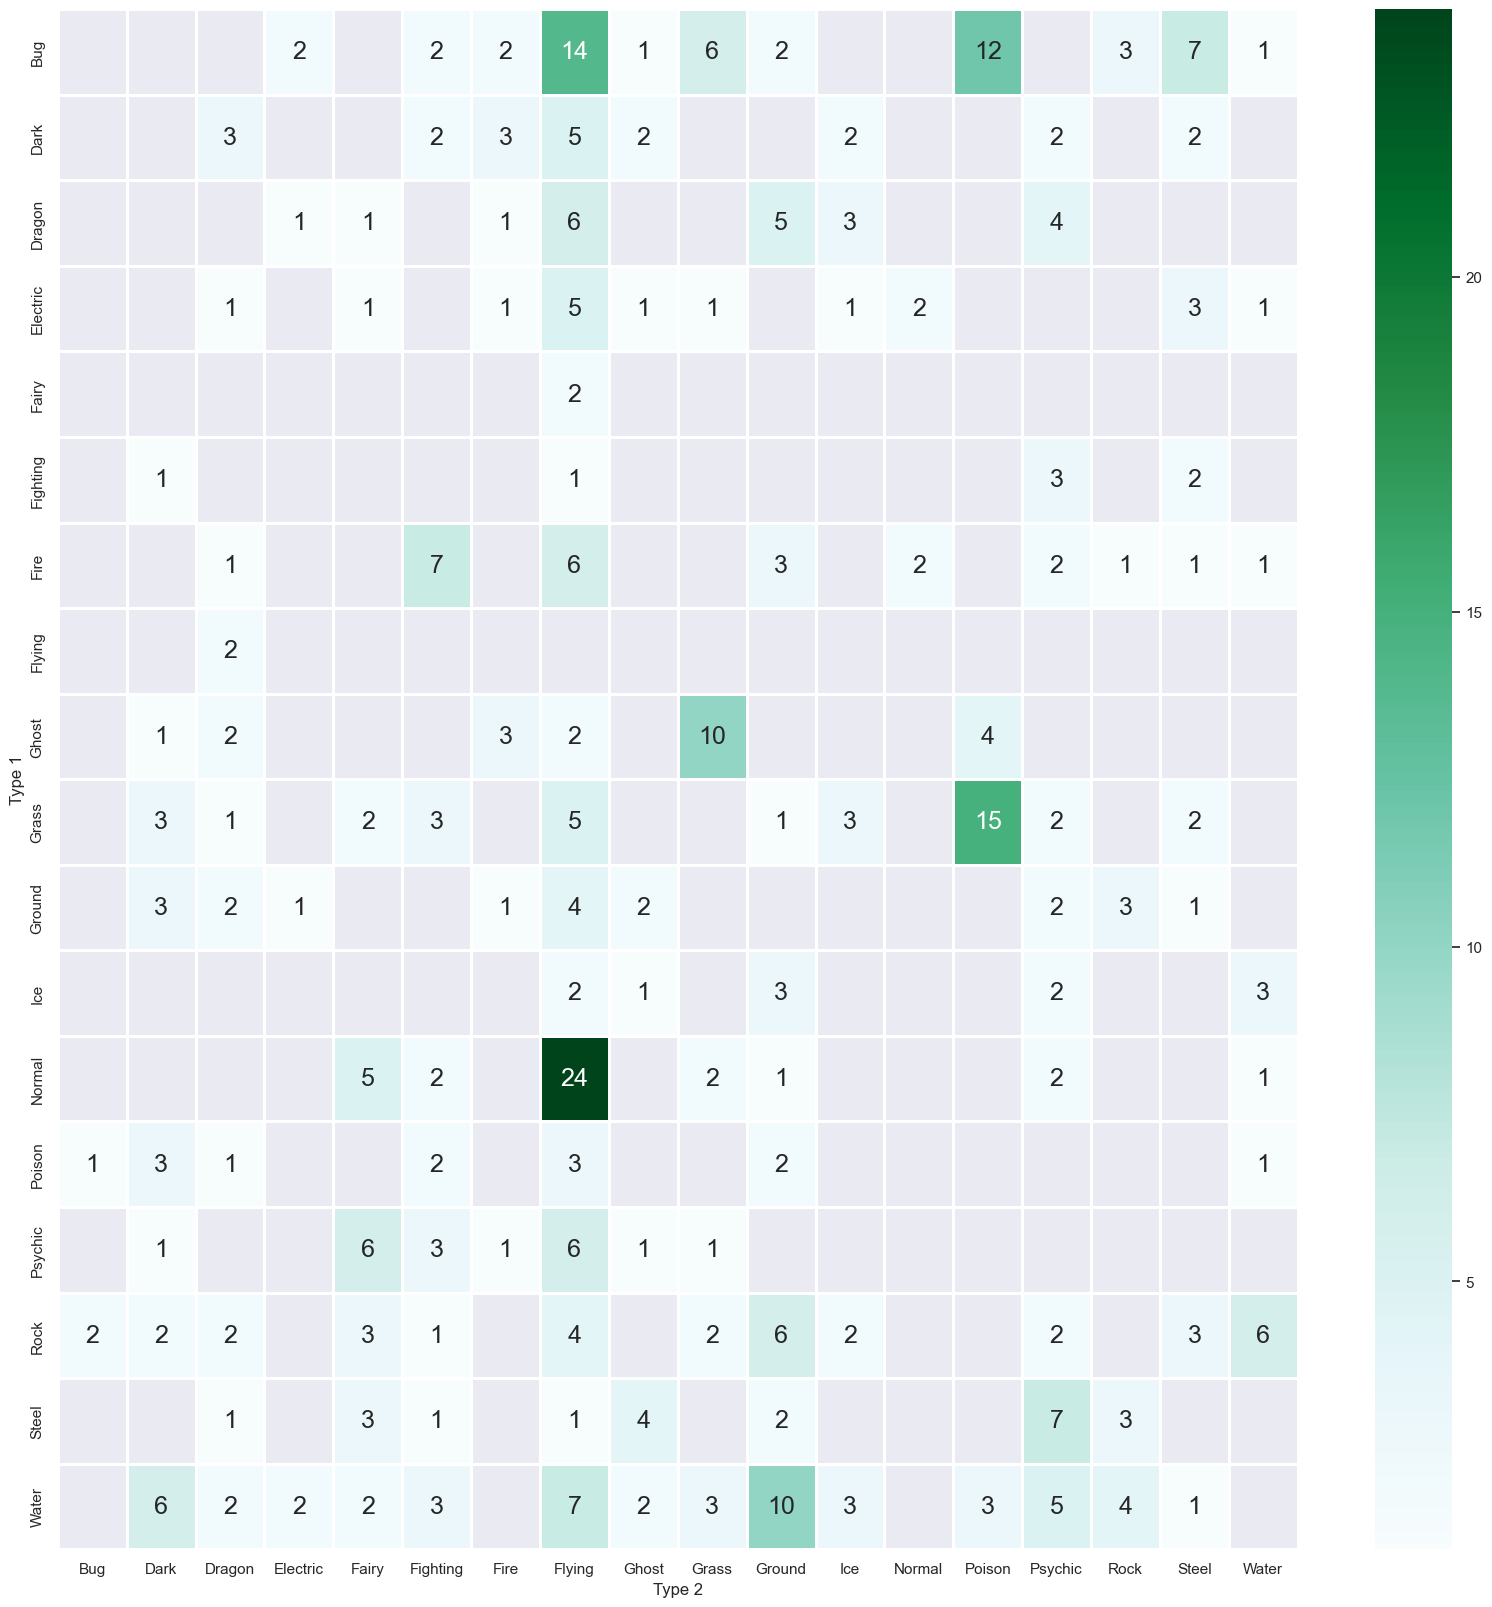

In [35]:
# Pokemons with Dual Types -- I and II
dualtype_data = pkmndata[pkmndata["Type 2"].isnull() == False]
print("Pokemons with Types 1 and 2 :", len(dualtype_data))

# Distribution of the Two Types
f = plt.figure(figsize=(20, 20))
sb.heatmap(dualtype_data.groupby(['Type 1', 'Type 2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

In [ ]:
# Distribution of the Two Types over Generations
f, axes = plt.subplots(3, 2, figsize=(20, 30))

dualtype_gen1 = dualtype_data[dualtype_data["Generation"] == 1]
dualtype_gen2 = dualtype_data[dualtype_data["Generation"] == 2]
dualtype_gen3 = dualtype_data[dualtype_data["Generation"] == 3]
dualtype_gen4 = dualtype_data[dualtype_data["Generation"] == 4]
dualtype_gen5 = dualtype_data[dualtype_data["Generation"] == 5]
dualtype_gen6 = dualtype_data[dualtype_data["Generation"] == 6]

sb.heatmap(dualtype_gen1.groupby(['Type 1', 'Type 2']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[0,0])
sb.heatmap(dualtype_gen2.groupby(['Type 1', 'Type 2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[0,1])
sb.heatmap(dualtype_gen3.groupby(['Type 1', 'Type 2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[1,0])
sb.heatmap(dualtype_gen4.groupby(['Type 1', 'Type 2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[1,1])
sb.heatmap(dualtype_gen5.groupby(['Type 1', 'Type 2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[2,0])
sb.heatmap(dualtype_gen6.groupby(['Type 1', 'Type 2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[2,1])

#### Legendary Pokemons

![Legendary Pokemons](images/PokemonLegendary.png)

We understand that there are 65 Legendary Pokemons till Generation 6. Rare, powerful, interesting, and hard to catch. Let's explore them in the dataset.

In [ ]:
# Legendary Pokemons in the Dataset
legnd_data = pkmndata[pkmndata["Legendary"] == True]
print("Number of Legendary Pokemons :", len(legnd_data))

# Legendary Pokemons in each Generation
print(legnd_data["Generation"].value_counts())
sb.catplot(y = "Generation", data = legnd_data, kind = "count", height = 8)

In [ ]:
# Legendary Pokemons in the Dataset
legnd_data = pkmndata[pkmndata["Legendary"] == True]
print("Number of Legendary Pokemons :", len(legnd_data))

# Legendary Pokemons in each Primary Type
print(legnd_data["Type 1"].value_counts())
sb.catplot(y = "Type 1", data = legnd_data, kind = "count", 
           order = legnd_data["Type 1"].value_counts().index, height = 8)

In [ ]:
# Legendary Pokemons with two Types -- I and II
dualtype_legnd_data = legnd_data[legnd_data["Type 2"].isnull() == False]
print("Legendary Pokemons with Types 1 and 2 :", len(dualtype_legnd_data))


# Distribution over the Two Types
f = plt.figure(figsize=(20, 20))
sb.heatmap(dualtype_legnd_data.groupby(['Type 1', 'Type 2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

#### Statistical Summary of Pokemon Points

In [ ]:
# Extract only the numeric data variables
numeric_data = pd.DataFrame(pkmndata[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]])

# Summary Statistics for all Variables
numeric_data.describe().round(2)

In [ ]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

In [ ]:
# Correlation Matrix
print(numeric_data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [ ]:
# Draw pairs of variables against one another
sb.pairplot(data = numeric_data)

#### Unique Names and IDs of Pokemons

In [ ]:
# Names of Pokemon in the Dataset
print("Unique Names of Pokemon :", len(pkmndata["Name"].unique()))

In [ ]:
# IDs of Pokemon in the Dataset
print("Unique IDs of Pokemon :", len(pkmndata["#"].unique()))

In [ ]:
# Pokemons with Duplicate IDs
dupid_data = pkmndata[pkmndata.duplicated("#", keep = False)]
dupid_data.sort_values(by = "Name").head(n = 10)

In [ ]:
# Pokemons with Duplicate IDs
print("Pokemons with Duplicate IDs :", len(dupid_data))
dupids = dupid_data["#"].unique()
print("Unique Pokemons with DupIDs :", len(dupids))
print()

# Group Pokemons with same ID
print("# \t Count \t List of Pokemons with Duplicate IDs")
print()
for dupid in dupids:
    dupid_list = list(dupid_data[dupid_data["#"] == dupid]["Name"])
    print(dupid, "\t", len(dupid_list), "\t", dupid_list)

---

## Clean the Dataset

Once we are done with the basic exploration of variables, it's time to *clean* and *tidy-up* the dataset.

In [ ]:
# Create a copy of the Dataset
pkmndata_clean = pkmndata.copy()

# Rename "#" to "ID" of Pokemon
pkmndata_clean.rename(columns = {'#': 'ID'}, inplace = True)

# Convert all Variable Names to UPPERCASE
pkmndata_clean.columns = pkmndata_clean.columns.str.upper()

# Remove all spaces and dots from Variable Names
pkmndata_clean.columns = pkmndata_clean.columns.str.replace(".","")
pkmndata_clean.columns = pkmndata_clean.columns.str.replace(" ","_")

# Print the Variable Information to check
pkmndata_clean.info()

#### Fix Pokemon Names

We take cue from the Pokedex dataset (https://pokemondb.net/pokedex/all), and perform the following (not in order).   

> Convert `[Name]Mega [Name]` to `[Name]Mega`    
> Convert `[Name]Mega [Name] X` to `[Name]MegaX`    
> Convert `[Name]Mega [Name] Y` to `[Name]MegaY`    
> Convert `[Name][Form] Forme` to `[Name][Form]`    
> Convert `[Name][Cloak] Cloak` to `[Name][Cloak]`    
> Convert `[Name][Rotom] Rotom` to `[Name][Rotom]`    
> Convert `[Name][Size] Size` to `[Name][Size]`    
> Convert `HoopaHoopa [Form]` to `Hoopa[Form]`     

Regular Expression (RegEx) search-and-replace is a lovely tool to accomplish such tasks. We use `re` library in Python.

In [ ]:
# Fix the weird Names of Pokemons
import re

# Fix names with extra Extensions
pkmndata_clean["NAME"] = pkmndata_clean["NAME"].apply(lambda x: re.sub(r'(.+)(Forme)',r'\1', x))
pkmndata_clean["NAME"] = pkmndata_clean["NAME"].apply(lambda x: re.sub(r'(.+)(Cloak)',r'\1', x))
pkmndata_clean["NAME"] = pkmndata_clean["NAME"].apply(lambda x: re.sub(r'(.+)(Rotom)',r'\1', x))
pkmndata_clean["NAME"] = pkmndata_clean["NAME"].apply(lambda x: re.sub(r'(.+)(Size)',r'\1', x))
pkmndata_clean["NAME"] = pkmndata_clean["NAME"].apply(lambda x: re.sub(r'(Hoopa)(.+)',r'\2', x))

# Fix names with Mega in between
pkmndata_clean["NAME"] = pkmndata_clean["NAME"].apply(lambda x: re.sub(r'(.+Mega)(.+)',r'\1', x))

# Remove Blanks from all the Names
pkmndata_clean["NAME"] = pkmndata_clean["NAME"].apply(lambda x: re.sub(r'\s+','', x))

In [ ]:
# Pokemons with Duplicate IDs
dupid_data_clean = pkmndata_clean[pkmndata_clean.duplicated("ID", keep = False)]
print("Pokemons with Duplicate IDs :", len(dupid_data_clean))
dupids_clean = dupid_data_clean["ID"].unique()
print("Unique Pokemons with DupIDs :", len(dupids_clean))
print()

# Group Pokemons with same ID
print("# \t Count \t List of Pokemons with Duplicate IDs")
print()
for dupid_clean in dupids_clean:
    dupid_list_clean = list(dupid_data_clean[dupid_data_clean["ID"] == dupid_clean]["NAME"])
    print(dupid_clean, "\t", len(dupid_list_clean), "\t", dupid_list_clean)

In [ ]:
# X,Y labels missing for Charizard (6) and Mewtwo (150)
print(pkmndata_clean[pkmndata_clean["ID"] == 6]["NAME"])
print(pkmndata_clean[pkmndata_clean["ID"] == 150]["NAME"])

In [ ]:
# Fix the X,Y labels for Charizard and Mewtwo
pkmndata_clean.loc[7,"NAME"] = "CharizardMegaX"
pkmndata_clean.loc[8,"NAME"] = "CharizardMegaY"
pkmndata_clean.loc[163,"NAME"] = "MewtwoMegaX"
pkmndata_clean.loc[164,"NAME"] = "MewtwoMegaY"

In [ ]:
# Set NAME as the Index of the DataFrame
pkmndata_clean = pkmndata_clean.set_index('NAME')

# Print the DataFrame to check
pkmndata_clean.sample(n = 10)

In [ ]:
# Check the Variable Information
pkmndata_clean.info()

#### Tackle the Missing Values

Note that `TYPE_2` has only 414 values, instead of the overall 800. Let's fill-in the missing values with the string `NoType` for clarity about single/dual types.     


Missing values are generally represented as `NaN` in numeric arrays, `None` or `NaN` in object arrays, `NaT` in datetime. In certain cases, the missing values may mean the data is not available or not required (as in here). But it may also be errors from data acquisition or data processing. We should check for that.

In [ ]:
# Check missing values in data
pkmndata_clean.isnull().sum()

In [ ]:
# Fill missing values in data
pkmndata_clean["TYPE_2"].fillna(value = "NoType", inplace = True)

In [ ]:
# Check the Clean Dataset
pkmndata_clean.info()

In [ ]:
# Check the Variable Information
print(pkmndata_clean["TYPE_2"].dropna().value_counts())

---

## Pokemons worth Exploring

![My Favorites](images/PokemonMyFabs.png)

Of course, we all have our favourite Pokemons -- mine are Pikachu, Jigglypuff, Togepi, Bulbasaur and Snorlax -- as you can tell from the image above.    

In [ ]:
# My Favorites (entirely based on cuteness index, and not on their power)
pkmndata_clean.loc[["Pikachu", "Jigglypuff", "Togepi", "Bulbasaur", "Snorlax"]]

However, there are some other Pokemons worth exploring -- especially the strongest and the weakest Pokemons, may be for each type and generation.

#### Strongest and Weakest Pokemons

In [ ]:
# Strongest Pokemons -- the Top 10
pkmndata_clean.sort_values('TOTAL', ascending=False).head(10)

In [ ]:
# Weakest Pokemons -- the Bottom 10
pkmndata_clean.sort_values('TOTAL', ascending=True).head(10)

#### Strongest and Weakest Pokemons -- Legendary and Non-Legendary

In [ ]:
# Strongest Legendary Pokemons -- the Top 10
pkmndata_clean[pkmndata_clean["LEGENDARY"] == True].sort_values('TOTAL', ascending=False).head(10)

In [ ]:
# Weakest Legendary Pokemons -- the Bottom 10
pkmndata_clean[pkmndata_clean["LEGENDARY"] == True].sort_values('TOTAL', ascending=True).head(10)

In [ ]:
# Strongest Non-Legendary Pokemons -- the Top 10
pkmndata_clean[pkmndata_clean["LEGENDARY"] == False].sort_values('TOTAL', ascending=False).head(10)

In [ ]:
# Weakest Non-Legendary Pokemons -- the Bottom 10
pkmndata_clean[pkmndata_clean["LEGENDARY"] == False].sort_values('TOTAL', ascending=True).head(10)

#### Strongest and Weakest Pokemons -- Across Generations

In [ ]:
# Strongest Pokemons in each Generation -- the Top 10
generation = 1
pkmndata_clean[pkmndata_clean["GENERATION"] == generation].sort_values('TOTAL', ascending=False).head(10)

In [ ]:
# Weakest Pokemons in each Generation -- the Bottom 10
generation = 1
pkmndata_clean[pkmndata_clean["GENERATION"] == generation].sort_values('TOTAL', ascending=True).head(10)

#### Strength of Pokemons over various Types

In [ ]:
# Compute the Average TOTAL across every pair of TYPEs
total_means = pkmndata_clean.groupby(['TYPE_1', 'TYPE_2']).mean().loc[:, 'TOTAL']

# Strongest Pokemons in each Pair of Types -- the Top 10
print(total_means.reset_index().sort_values('TOTAL', ascending=False).head(10).round(2))

# Heatmap of Average TOTAL across every pair of TYPEs
f = plt.figure(figsize=(20, 20))
sb.heatmap(total_means.unstack(), linewidths = 1,
           annot = True, fmt = ".0f", annot_kws = {"size": 18}, cmap = "BuGn")

#### Strength of Legendary Pokemons over various Types

In [ ]:
# Compute the Average TOTAL across every pair of TYPEs
total_means = pkmndata_clean[pkmndata_clean["LEGENDARY"] == True].groupby(['TYPE_1', 'TYPE_2']).mean().loc[:, 'TOTAL']

# Strongest Pokemons in each Pair of Types -- the Top 10
print(total_means.reset_index().sort_values('TOTAL', ascending=False).head(10).round(2))

# Heatmap of Average TOTAL across every pair of TYPEs
f = plt.figure(figsize=(20, 20))
sb.heatmap(total_means.unstack(), linewidths = 1,
           annot = True, fmt = ".0f", annot_kws = {"size": 18}, cmap = "BuGn")